In [41]:
#-*- coding:utf-8 -*-

# pandas import 
import pandas as pd

# Graph lib import 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc


rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('./CARD_SUBWAY_MONTH_202004.csv')

data['사용일자'] = pd.to_datetime(data['사용일자'], format='%Y%m%d')
data['등록일자'] = pd.to_datetime(data['등록일자'], format='%Y%m%d')

data['역ID'] = data['역ID'].apply(str)

data

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,2020-04-01,2호선,207,상왕십리,11717,11231,2020-04-04
1,2020-04-01,2호선,208,왕십리(성동구청),13642,11395,2020-04-04
2,2020-04-01,2호선,209,한양대,5945,6422,2020-04-04
3,2020-04-01,2호선,210,뚝섬,18383,19845,2020-04-04
4,2020-04-01,2호선,211,성수,30124,33060,2020-04-04
...,...,...,...,...,...,...,...
17717,2020-04-30,2호선,207,상왕십리,7262,6606,2020-05-03
17718,2020-04-30,2호선,208,왕십리(성동구청),9542,8232,2020-05-03
17719,2020-04-30,2호선,209,한양대,3075,3140,2020-05-03
17720,2020-04-30,2호선,210,뚝섬,10948,11204,2020-05-03


In [42]:
data.describe()

,승차총승객수,하차총승객수
count,17722.000000,17722.000000
mean,8414.332694,8389.793364
std,8757.551270,8895.531953
min,1.000000,0.000000
25%,2698.500000,2627.000000
50%,5817.500000,5698.000000
75%,10968.000000,10812.750000
max,90440.000000,93972.000000


In [43]:
group_by_register_date = data.groupby(data['사용일자']).sum()

group_by_register_date[['승차총승객수', '하차총승객수']]

,승차총승객수,하차총승객수
사용일자,,
2020-04-01,5463892,5449083
2020-04-02,5449915,5436170
2020-04-03,5680884,5667374
2020-04-04,3434007,3420935
2020-04-05,2370375,2359423
2020-04-06,5577891,5563565
2020-04-07,5606422,5592396
2020-04-08,5638965,5624584
2020-04-09,5628249,5614677


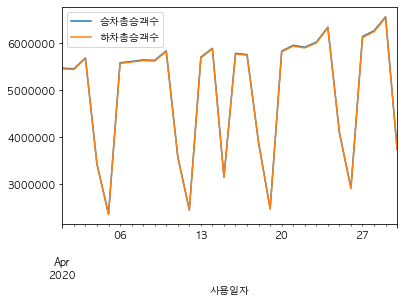

In [72]:
group_by_register_date[['승차총승객수', '하차총승객수']].plot()

In [74]:
group_by_station_name = data.groupby([data['역명'], data['사용일자']]).sum()

group_by_station_name

승차총승객수  하차총승객수
역명        사용일자                      
4.19민주묘지  2020-04-01    2279    2216
          2020-04-02    2279    2186
          2020-04-03    2266    2180
          2020-04-04    1782    1587
          2020-04-05    1486    1198
...                      ...     ...
흑석(중앙대입구) 2020-04-26    3282    3493
          2020-04-27    6966    7448
          2020-04-28    7263    7590
          2020-04-29    7526    7574
          2020-04-30    4279    4108

[15300 rows x 2 columns]

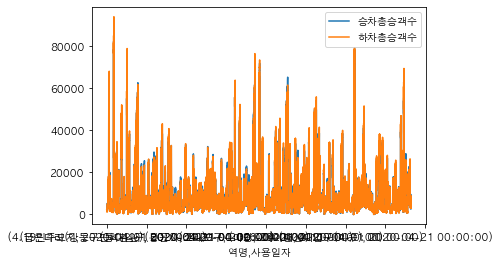

In [75]:
group_by_station_name.plot()

In [76]:
group_by_station_name.describe()

,승차총승객수,하차총승객수
count,15300.000000,15300.000000
mean,9746.327059,9717.903137
std,10703.178075,10948.547403
min,8.000000,7.000000
25%,2869.750000,2772.000000
50%,6374.500000,6296.500000
75%,12493.500000,12297.500000
max,90440.000000,93972.000000


In [81]:
station = group_by_station_name.copy().reset_index()

station

,역명,사용일자,승차총승객수,하차총승객수
0,4.19민주묘지,2020-04-01,2279,2216
1,4.19민주묘지,2020-04-02,2279,2186
2,4.19민주묘지,2020-04-03,2266,2180
3,4.19민주묘지,2020-04-04,1782,1587
4,4.19민주묘지,2020-04-05,1486,1198
...,...,...,...,...
15295,흑석(중앙대입구),2020-04-26,3282,3493
15296,흑석(중앙대입구),2020-04-27,6966,7448
15297,흑석(중앙대입구),2020-04-28,7263,7590
15298,흑석(중앙대입구),2020-04-29,7526,7574


In [85]:
station = station[station['역명'] == '한양대']

station_group = station.groupby([station['역명'],station['사용일자']]).sum()

station_group

승차총승객수  하차총승객수
역명  사용일자                      
한양대 2020-04-01    5945    6422
    2020-04-02    5994    6596
    2020-04-03    6133    6594
    2020-04-04    2972    3051
    2020-04-05    1946    2154
    2020-04-06    5911    6569
    2020-04-07    6002    6560
    2020-04-08    6008    6608
    2020-04-09    6121    6663
    2020-04-10    6384    6734
    2020-04-11    2909    3047
    2020-04-12    1883    2224
    2020-04-13    6262    7025
    2020-04-14    6503    7248
    2020-04-15    2607    2862
    2020-04-16    6451    7181
    2020-04-17    6433    6918
    2020-04-18    3625    3768
    2020-04-19    1991    2252
    2020-04-20    6453    7109
    2020-04-21    6582    7260
    2020-04-22    6625    7087
    2020-04-23    6551    7407
    2020-04-24    6767    7439
    2020-04-25    3234    3368
    2020-04-26    2038    2390
    2020-04-27    6561    7260
    2020-04-28    6870    7552
    2020-04-29    6955    7591
    2020-04-30    3075    3140

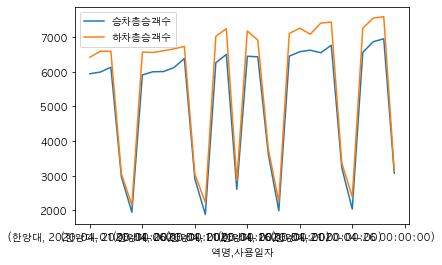

In [91]:
station_group.plot()

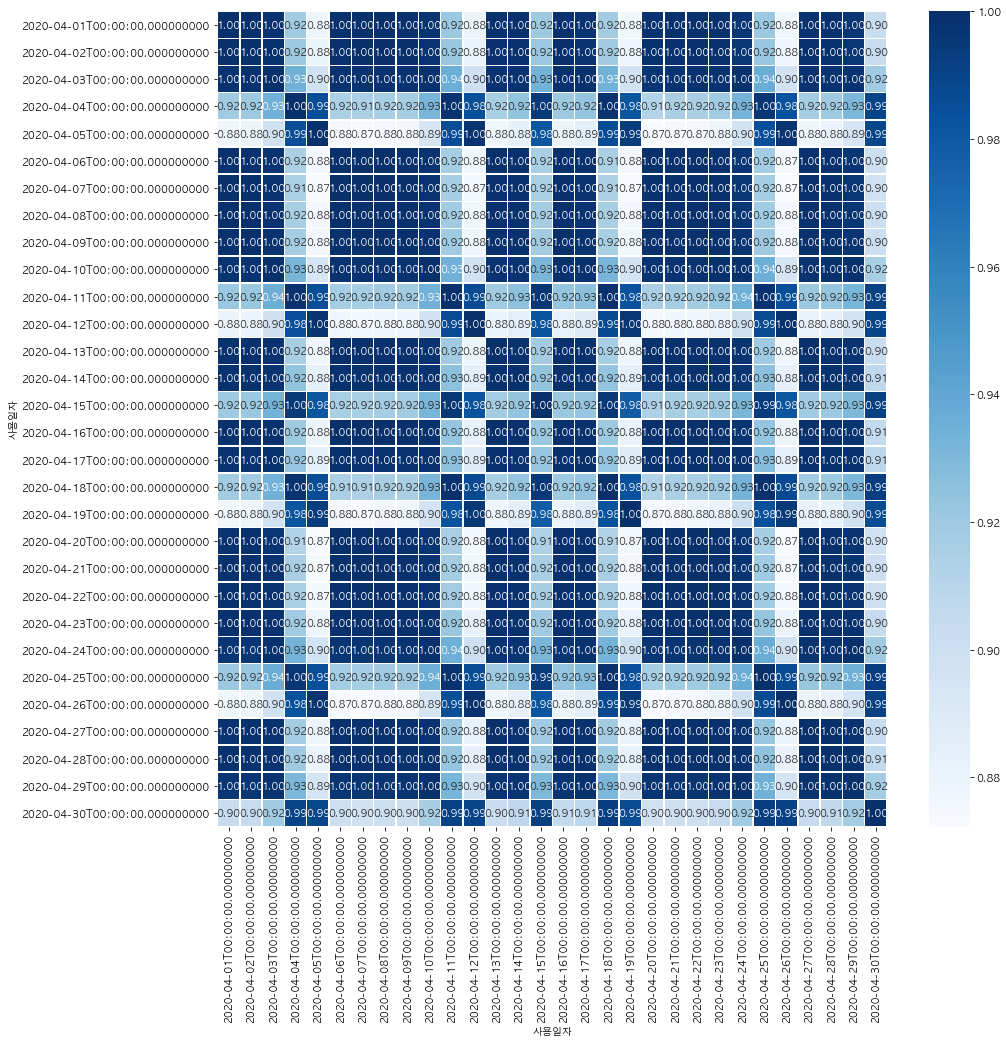

In [96]:
import seaborn as sns

corr_data = group_by_station_name.copy().reset_index()

corr_data_pivot = corr_data.pivot(index='역명', columns='사용일자', values='승차총승객수')

plt.figure(figsize=(15,15))
#sns.heatmap(data = corr_data.corr(), annot=True, 
#            fmt = '.2f', linewidths=.5, cmap='Blues')

sns.heatmap(data = corr_data_pivot.corr(), annot=True, 
            fmt = '.2f', linewidths=.5, cmap='Blues')
